In [1]:
import yfinance as yf

In [2]:
df = yf.download(tickers='GBPUSD=X', period='730d', interval='60m')


[*********************100%***********************]  1 of 1 completed


In [3]:
len(df)

17309

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-21 18:00:00,1.285777,1.286124,1.285446,1.285777,1.285777,0
2023-07-21 19:00:00,1.285843,1.286620,1.285777,1.285810,1.285810,0
2023-07-21 20:00:00,1.285975,1.285975,1.284934,1.285661,1.285661,0
2023-07-21 21:00:00,1.285777,1.286256,1.285231,1.285463,1.285463,0
2023-07-21 22:00:00,1.285248,1.285248,1.285248,1.285248,1.285248,0


In [6]:
# # Calculate the 5-minute and 8-minute moving averages
# df['1_d_ma'] = df['Close'].rolling('1d').mean()
# df['3_d_ma'] = df['Close'].rolling('3d').mean()
# Calculate the 5-minute and 8-minute moving averages
df['1_day_ma'] = df['Close'].rolling('1D').mean()
df['3_day_ma'] = df['Close'].rolling('3D').mean()
df['7_day_ma'] = df['Close'].rolling('7D').mean()
# data['1_week_ma'] = data['Close'].rolling('1W').mean()

In [7]:
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)

In [11]:
df['RSI'] = df['RSI'].fillna(0)

In [13]:
columns_to_normalize = df.columns

# Min-Max scaling relative to itself
df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Assuming you have an RSI column named 'RSI'
# Min-Max scaling relative to itself
# df['RSI'] = (df['RSI'] - df['RSI'].min()) / (df['RSI'].max() - df['RSI'].min())

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,1_day_ma,3_day_ma,7_day_ma,RSI
Datetime,,,,,,,,,,
2020-10-06 00:00:00,0.674864,0.659741,0.675883,0.673953,0.673953,NaN,0.665863,0.655855,0.644831,0.000000
2020-10-06 01:00:00,0.676264,0.660337,0.677062,0.674128,0.674128,NaN,0.665955,0.655951,0.644931,0.000000
2020-10-06 02:00:00,0.676352,0.660246,0.675796,0.672377,0.672377,NaN,0.665371,0.655345,0.644295,0.000000
2020-10-06 03:00:00,0.673508,0.658367,0.675403,0.673428,0.673428,NaN,0.665355,0.655329,0.644278,0.000000
2020-10-06 04:00:00,0.674252,0.661667,0.675665,0.673078,0.673078,NaN,0.665272,0.655243,0.644188,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-07-21 18:00:00,0.641089,0.623813,0.642731,0.639865,0.639865,NaN,0.631690,0.635815,0.643315,0.441254
2023-07-21 19:00:00,0.641261,0.625160,0.643587,0.639951,0.639951,NaN,0.631679,0.635073,0.642700,0.429423
2023-07-21 20:00:00,0.641603,0.623408,0.641405,0.639565,0.639565,NaN,0.631575,0.634346,0.642107,0.426008


In [19]:
# Calculate the 5-minute and 8-minute moving averages
df['1_day_ma'] = df['Close'].rolling('1D').mean()
df['3_day_ma'] = df['Close'].rolling('3D').mean()
df['7_day_ma'] = df['Close'].rolling('7D').mean()
# data['1_week_ma'] = data['Close'].rolling('1W').mean()


In [19]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '1_day_ma',
       '3_day_ma', '7_day_ma', 'RSI'],
      dtype='object')

In [21]:
save_df = df[['Open', 'High', 'Low', 'Close', '1_day_ma',
       '3_day_ma', '7_day_ma', 'RSI']]
save_df.to_csv('740.csv')

In [24]:
import numpy as np

In [25]:
save_df.iloc[0][save_df.columns].values.astype(np.float32)

array([0.6748636 , 0.65974134, 0.67588323, 0.67395324, 0.6658626 ,
       0.65585506, 0.6448309 , 0.        ], dtype=float32)

In [27]:
import pandas as pd

In [41]:
save_df.to_csv('740.csv', index=False)

In [38]:
df2 = pd.read_csv('test.csv')

In [39]:
df2.columns

Index(['Open', 'High', 'Low', 'Close', '1_day_ma', '3_day_ma', '7_day_ma',
       'RSI'],
      dtype='object')

In [40]:
df2.iloc[0][df2.columns].values.astype(np.float32)

array([0.6748636 , 0.65974134, 0.67588323, 0.67395324, 0.6658626 ,
       0.65585506, 0.6448309 , 0.        ], dtype=float32)

In [44]:
import pickle
import matplotlib.pyplot as plt

In [67]:
with open('rewards.pkl', 'rb') as f:
    rew = pickle.load(f)

In [68]:
with open('portfolio.pkl', 'rb') as f:
    port = pickle.load(f)

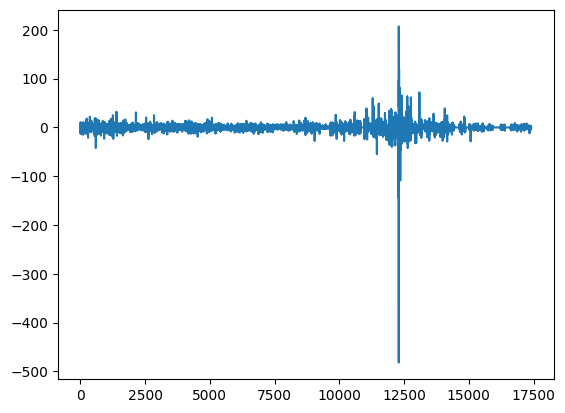

In [69]:
plt.plot(rew)

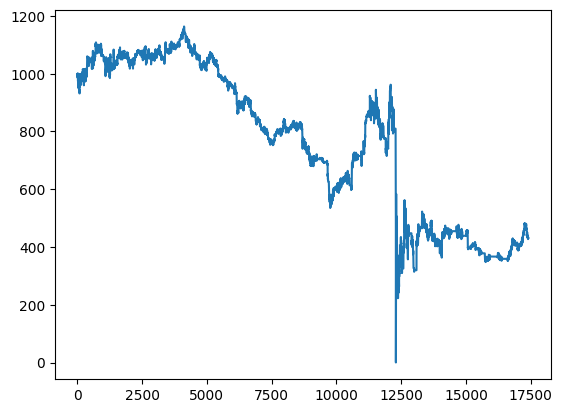

In [70]:
plt.plot(port)

In [28]:
df['Close'][:15]

Datetime
2023-05-01 00:00:00+01:00    1.255982
2023-05-01 00:05:00+01:00    1.256029
2023-05-01 00:10:00+01:00    1.255966
2023-05-01 00:15:00+01:00    1.256155
2023-05-01 00:20:00+01:00    1.256250
2023-05-01 00:25:00+01:00    1.256345
2023-05-01 00:30:00+01:00    1.256360
2023-05-01 00:35:00+01:00    1.256108
2023-05-01 00:40:00+01:00    1.255887
2023-05-01 00:45:00+01:00    1.255824
2023-05-01 00:50:00+01:00    1.255840
2023-05-01 00:55:00+01:00    1.255934
2023-05-01 01:00:00+01:00    1.256171
2023-05-01 01:05:00+01:00    1.255934
2023-05-01 01:10:00+01:00    1.255950
Name: Close, dtype: float64

In [66]:
rew[4], rew[5]

(0.0, 0.0)

In [65]:
port[5] - port[4]

1.1048349025573998

In [61]:
for i in range(len(port)):
    try:
        if port[i] < port[i+1]:
            print(i)
    except:
        pass

4
6
8
13
16
26
29
30
31
35
36
38
39
40
41
44
45
46
48
49
50
52
53
54
56
60
65
74
79
84
85
90
91
92
93
98
116
163
165
168
189
288
291
298
352
391
394
429
430
538
578
590
606
609
610
611
612
614
629
631
657
658
663
664
691
708
728
730
733
734
735
737
738
739
740
746
749
751
754
757
759
761
764
766
769
770
771
772
781
792
828
831
832
837
838
839
840
842
843
849
892
894
950
952
954
955
958
959
963
964
966
967
992
995
996
997
1000
1001
1003
1005
1008
1049
1050
1063
1064
1065
1067
1069
1073
1074
1080
1081
1085
1086
1087
1088
1089
1090
1091
1093
1096
1097
1098
1100
1101
1102
1103
1104
1105
1106
1107
1108
1110
1114
1115
1117
1118
1119
1121
1124
1125
1128
1130
1132
1133
1135
1151
1152
1154
1155
1157
1158
1159
1161
1163
1167
1169
1171
1190
1192
1193
1226
1228
1230
1231
1233
1234
1239
1240
1274
1277
1278
1281
1282
1283
1298
1300
1301
1311
1312
1313
1315
1321
1331
1332
1338
1339
1340
1341
1342
1344
1345
1347
1349
1352
1371
1372
1373
1376
1377
1381
1382
1388
1389
1390
1391
1397
1399
1408
1409
1412
